In [5]:
# Notebook 01
# Load data and basic EDA
# MCM 2024 C - Tennis Momentum

import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)


In [6]:
# 导入本地数据
data_path = "../data/raw/Wimbledon_featured_matches.csv"
df = pd.read_csv(data_path)

df.head()


,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,p2_games,p1_score,p2_score,server,serve_no,point_victor,p1_points_won,p2_points_won,game_victor,set_victor,p1_ace,p2_ace,p1_winner,p2_winner,winner_shot_type,p1_double_fault,p2_double_fault,p1_unf_err,p2_unf_err,p1_net_pt,p2_net_pt,p1_net_pt_won,p2_net_pt_won,p1_break_pt,p2_break_pt,p1_break_pt_won,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:00,1,1,1,0,0,0,0,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6.000,7.840,2,95.0,BC,NCTL,ND
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:38,1,1,2,0,0,0,0,0,15,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.253,7.094,1,118.0,B,CTL,ND
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:01,1,1,3,0,0,0,0,15,15,1,1,2,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,13.800,19.808,4,120.0,B,NCTL,D
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:31,1,1,4,0,0,0,0,15,30,1,1,1,2,2,0,0,0,0,1,0,F,0,0,0,0,0,1,0,0,0,0,0,0,0,0,51.108,75.631,13,130.0,BW,CTL,D
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:02:21,1,1,5,0,0,0,0,30,30,1,1,1,3,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.649,0.813,1,112.0,W,NCTL,NaN


In [7]:
# basic info
df.shape, df.columns

((7284, 46),
 Index(['match_id', 'player1', 'player2', 'elapsed_time', 'set_no', 'game_no', 'point_no', 'p1_sets', 'p2_sets',
        'p1_games', 'p2_games', 'p1_score', 'p2_score', 'server', 'serve_no', 'point_victor', 'p1_points_won',
        'p2_points_won', 'game_victor', 'set_victor', 'p1_ace', 'p2_ace', 'p1_winner', 'p2_winner', 'winner_shot_type',
        'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_net_pt', 'p2_net_pt', 'p1_net_pt_won',
        'p2_net_pt_won', 'p1_break_pt', 'p2_break_pt', 'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed',
        'p2_break_pt_missed', 'p1_distance_run', 'p2_distance_run', 'rally_count', 'speed_mph', 'serve_width',
        'serve_depth', 'return_depth'],
       dtype='object'))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7284 entries, 0 to 7283
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match_id            7284 non-null   object 
 1   player1             7284 non-null   object 
 2   player2             7284 non-null   object 
 3   elapsed_time        7284 non-null   object 
 4   set_no              7284 non-null   int64  
 5   game_no             7284 non-null   int64  
 6   point_no            7284 non-null   int64  
 7   p1_sets             7284 non-null   int64  
 8   p2_sets             7284 non-null   int64  
 9   p1_games            7284 non-null   int64  
 10  p2_games            7284 non-null   int64  
 11  p1_score            7284 non-null   object 
 12  p2_score            7284 non-null   object 
 13  server              7284 non-null   int64  
 14  serve_no            7284 non-null   int64  
 15  point_victor        7284 non-null   int64  
 16  p1_poi

## 初步数据理解

- 本数据集为 Wimbledon 比赛逐分（point-by-point）数据
- 重点关注字段：
  - server
  - point_winner
  - game_no
  - set_no
  - score
- 数据与题目中 “momentum swings” 的描述高度相关


In [9]:
df["match_id"].value_counts().head()


match_id
2023-wimbledon-1304    337
2023-wimbledon-1701    334
2023-wimbledon-1306    332
2023-wimbledon-1407    331
2023-wimbledon-1310    318
Name: count, dtype: int64

In [10]:
match_id = "2023-wimbledon-1701"
df_match = df[df["match_id"] == match_id].copy()

df_match.shape


(334, 46)

In [15]:
#按顺序排序1701比赛的数据
#为什么不用 elapsed_time 排序？
#原因是：
#1. elapsed_time 是字符串(object)，需要解析
#2.可能存在缺失 / 格式不统一
#3.有时记录的是“显示时间”，不是精确时间戳
df_match = df_match.sort_values(
    by=["set_no", "game_no", "point_no"]
).reset_index(drop=True)

df_match.head()


,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,p2_games,p1_score,p2_score,server,serve_no,point_victor,p1_points_won,p2_points_won,game_victor,set_victor,p1_ace,p2_ace,p1_winner,p2_winner,winner_shot_type,p1_double_fault,p2_double_fault,p1_unf_err,p2_unf_err,p1_net_pt,p2_net_pt,p1_net_pt_won,p2_net_pt_won,p1_break_pt,p2_break_pt,p1_break_pt_won,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth,point_result,cumulative_score
0,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,00:00:00,1,1,1,0,0,0,0,0,0,2,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.661,4.341,1,111.0,W,CTL,D,-1,-1
1,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,00:00:25,1,1,2,0,0,0,0,0,15,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.502,22.307,4,126.0,BW,NCTL,ND,1,0
2,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,00:01:19,1,1,3,0,0,0,0,15,15,2,2,1,2,1,0,0,0,0,1,0,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.786,2.926,2,102.0,BW,NCTL,ND,1,1
3,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,00:02:17,1,1,4,0,0,0,0,30,15,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.907,4.209,1,120.0,BC,CTL,ND,-1,0
4,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,00:03:02,1,1,5,0,0,0,0,30,30,2,1,1,3,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,12.881,8.676,2,108.0,W,CTL,ND,1,1


In [12]:
# 约定：player1 赢 = +1，player2 赢 = -1
df_match["point_result"] = np.where(
    df_match["point_victor"] == 1, 1, -1
)

df_match[["set_no", "game_no", "point_no", "point_victor", "point_result"]].head(10)


,set_no,game_no,point_no,point_victor,point_result
0,1,1,1,2,-1
1,1,1,2,1,1
2,1,1,3,1,1
3,1,1,4,2,-1
4,1,1,5,1,1
5,1,1,6,2,-1
6,1,1,7,2,-1
7,1,1,8,1,1
8,1,1,9,2,-1
9,1,1,10,2,-1


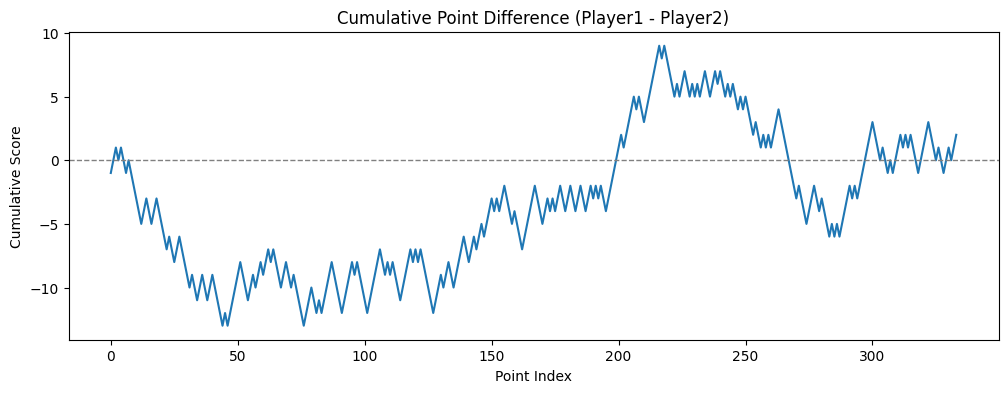

In [13]:
import matplotlib.pyplot as plt

df_match["cumulative_score"] = df_match["point_result"].cumsum()

plt.figure(figsize=(12, 4))
plt.plot(df_match["cumulative_score"])
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.title("Cumulative Point Difference (Player1 - Player2)")
plt.xlabel("Point Index")
plt.ylabel("Cumulative Score")
plt.show()


## 初步比赛进程观察

- 横轴为比赛中的逐分顺序
- 纵轴为 Player1 相对 Player2 的累计得分
- 曲线的斜率变化体现了比赛中势头的转移
- 后续可以在此基础上定义更平滑、更稳健的势头指标


## Notebook 01 总结

- 已完成数据读取、字段检查、缺失情况概览
- 选定单场比赛并按 set/game/point 重建顺序
- 构造 point_result 与 cumulative_score 作为后续势头分析的基础
- 势头指标的正式定义与比较见：02_define_momentum.ipynb
